In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [3]:
import geopandas as gpd

df = gpd.read_file("outputs/hotspot_vind_censustract_wc.geojson")

In [4]:
df["E_OVERPOV150"] = df["E_TOTPOP"] - df["E_POV150"]

In [10]:
# normalize demographic variables by each groups' total population
demographic_cols = ["E_POV150", "E_OVERPOV150"]

for dc in demographic_cols:
    df[dc + "_normalized"] = df[dc] * 100 / df[dc].sum()

df = df.rename(
    columns={
        "E_POV150_normalized": "Below 150% Poverty Treshold",
        "E_OVERPOV150_normalized": "Above 150% Poverty Treshold",
    }
)

#cats = ["E_POV150_normalized", "E_OVERPOV150_normalized"]
cats = ["Below 150% Poverty Treshold", "Above 150% Poverty Treshold"]

In [12]:
import plotting

hspts = plotting.get_hotspot_list()

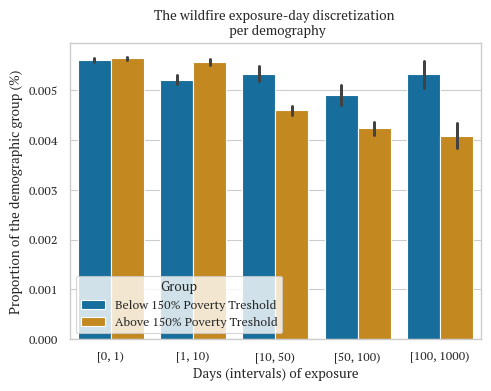

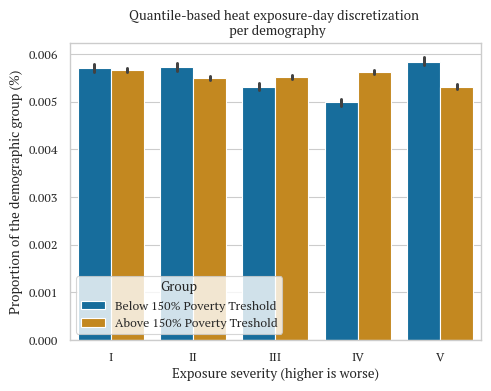

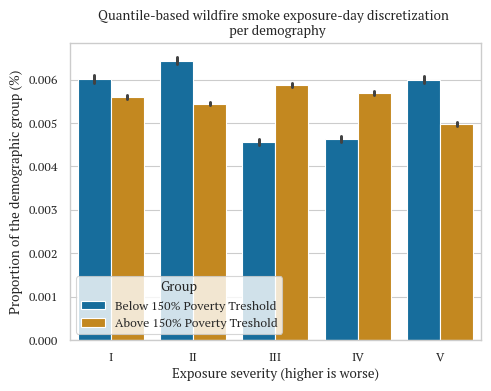

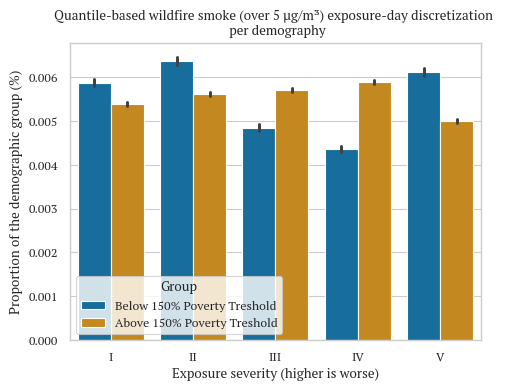

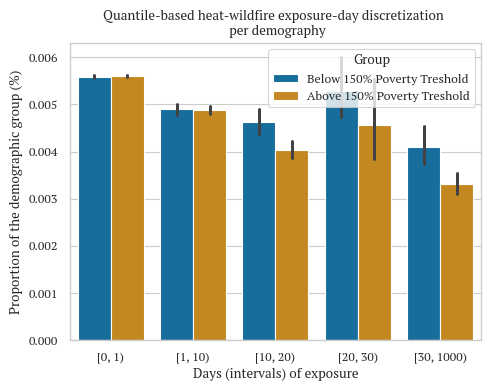

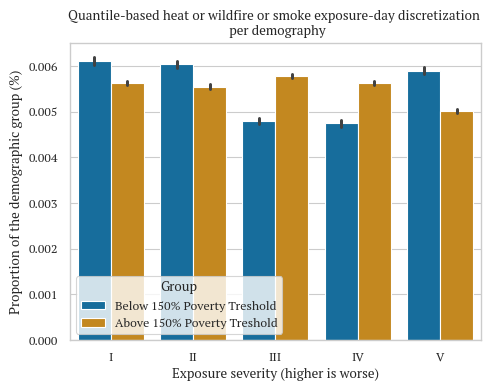

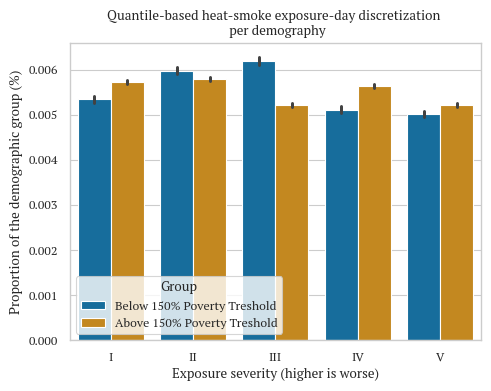

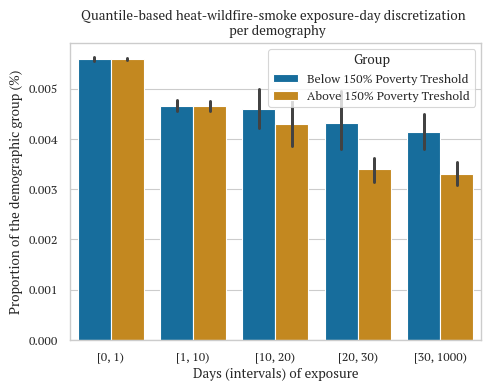

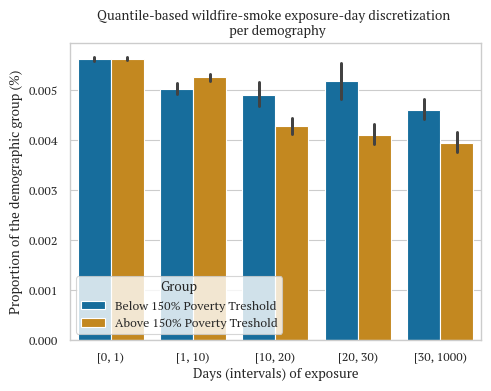

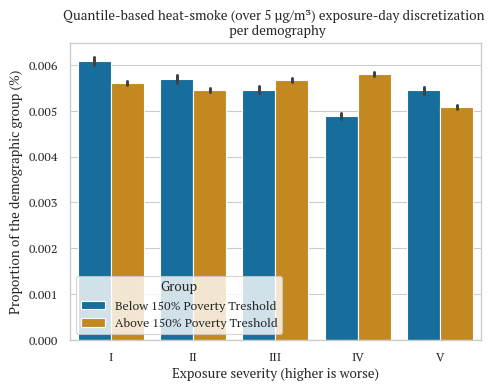

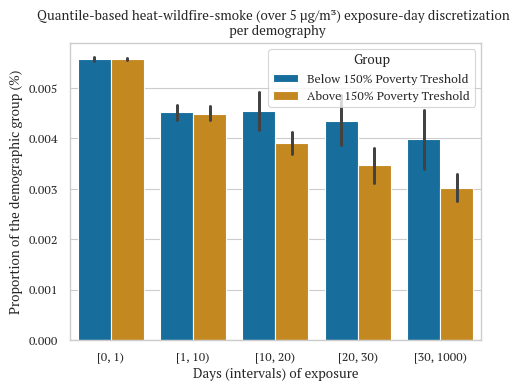

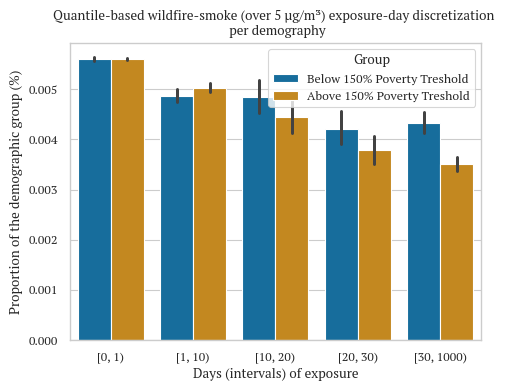

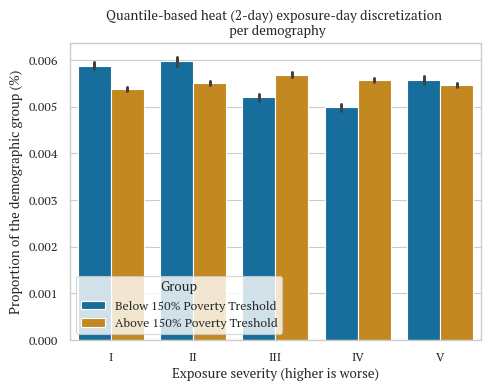

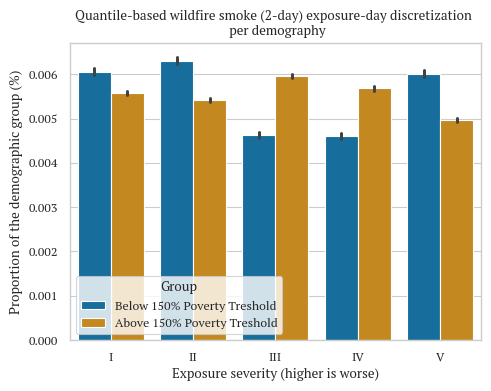

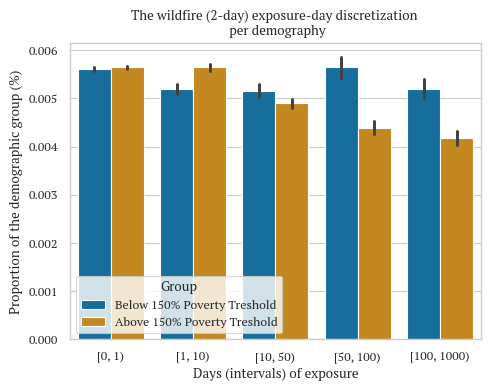

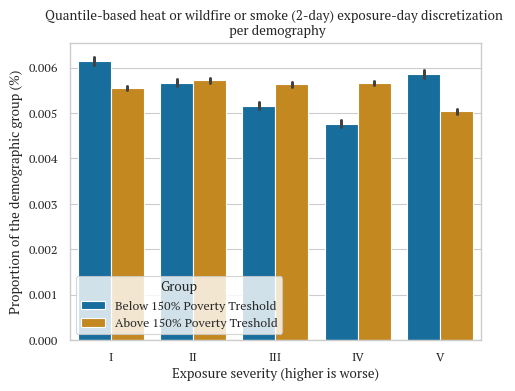

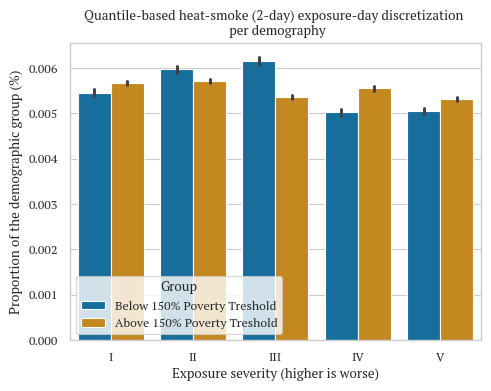

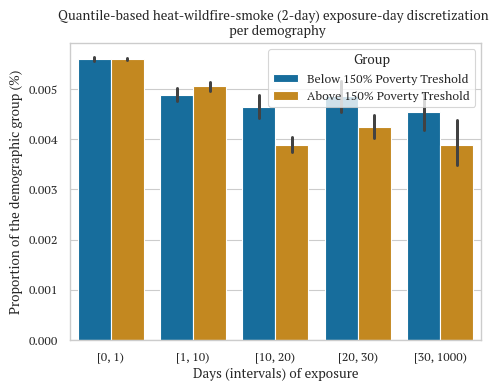

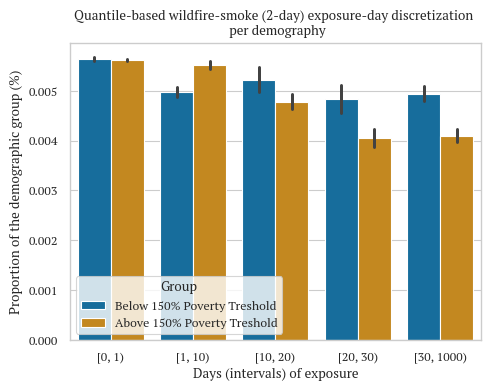

In [18]:
for hspt in hspts:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    df_melt = pd.melt(
        df[cats + ["exposure_category"]],
        id_vars="exposure_category",
        var_name="type",
        value_name="value",
    )

    plt.figure(figsize=(5, 4))

    sns.barplot(
        data=df_melt,
        x="exposure_category",
        y="value",
        hue="type",
        errorbar="ci",
    )

    plt.title(helper_400.get_title(hspt))

    plt.ylabel("Proportion of the demographic group (%)")
    plt.xlabel("Exposure severity (higher is worse)")

    if hspt in [
        "wfday",
        "wfday_2d",
        "hw",
        "hws",
        "ws",
        "hws5",
        "ws5",
        "hws_2d",
        "ws_2d",
    ]:
        xlabel = "Days (intervals) of exposure"
        plt.xlabel(xlabel)

    plt.legend(title="Group", loc="best") 
    plt.xticks(rotation=0)
    # ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig("figures/qbar_income" + "_" + hspt + "_wc.png")
    plt.show()

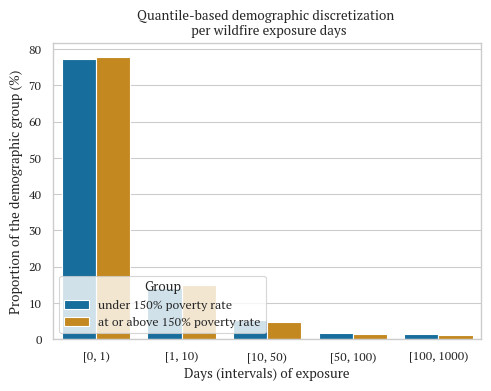

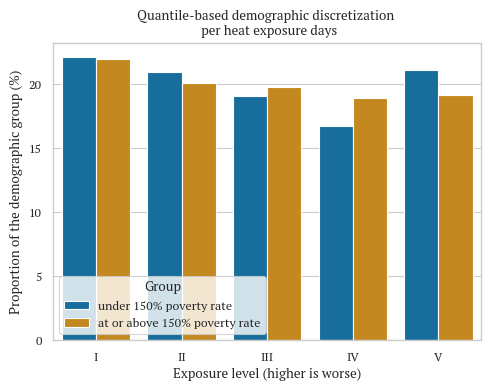

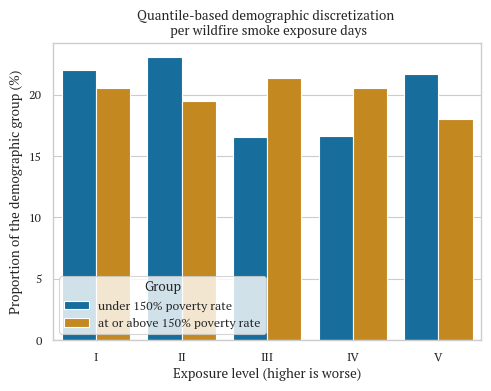

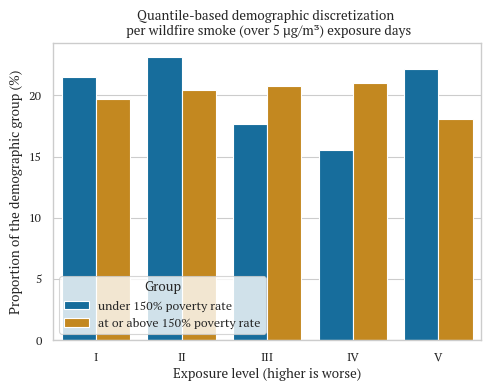

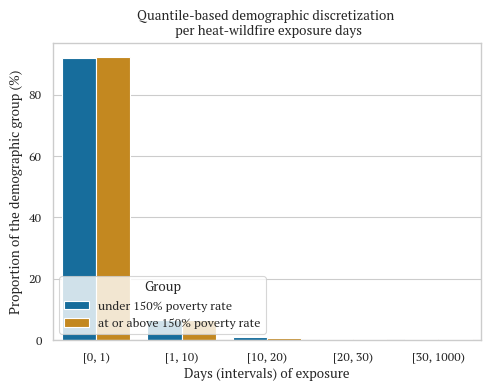

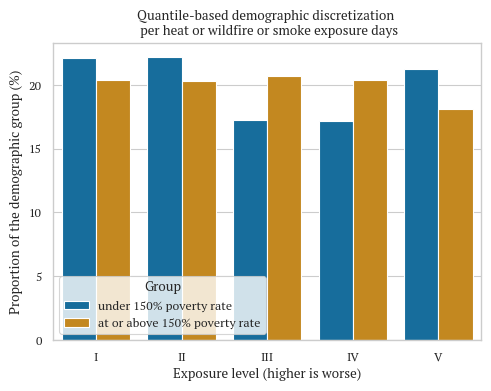

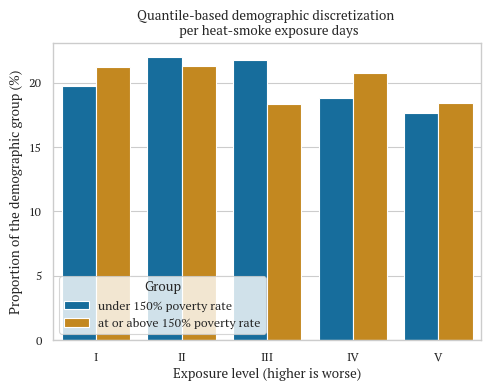

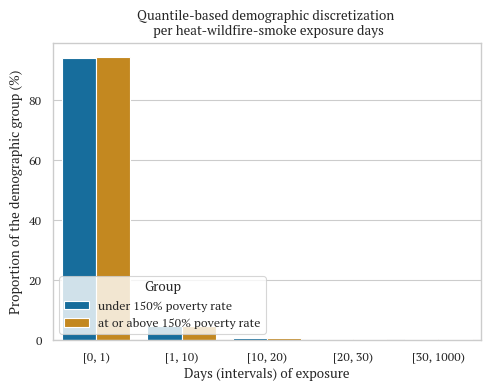

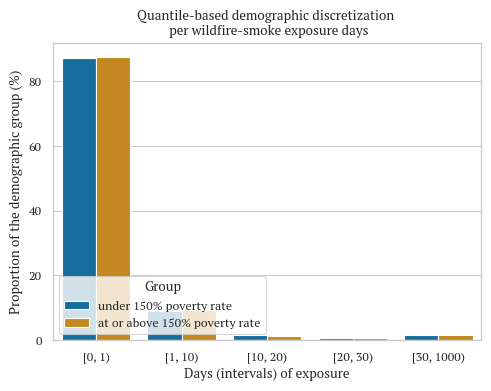

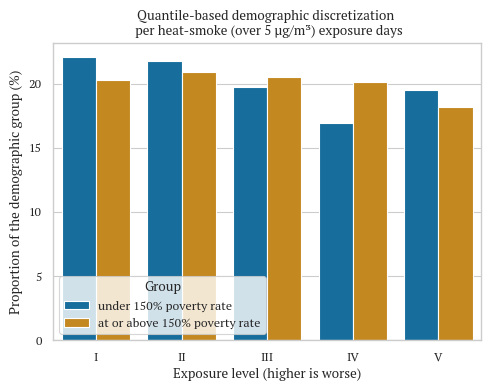

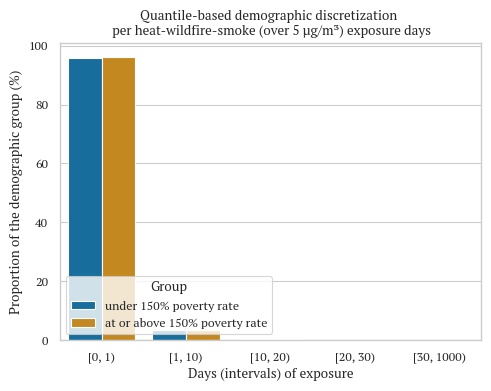

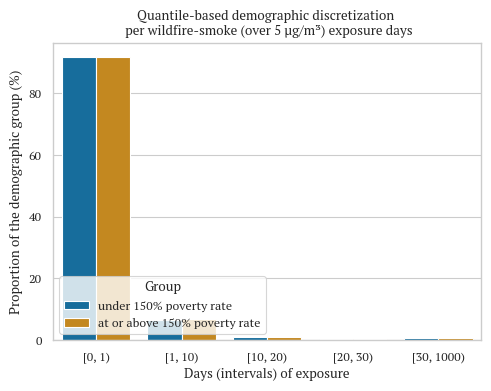

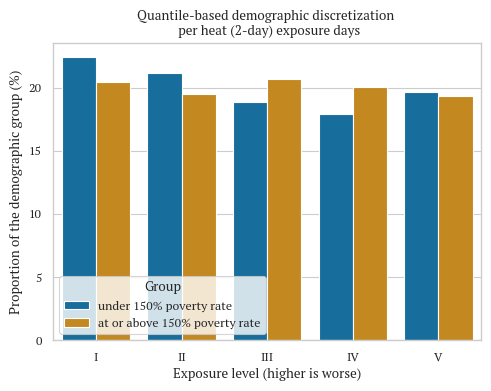

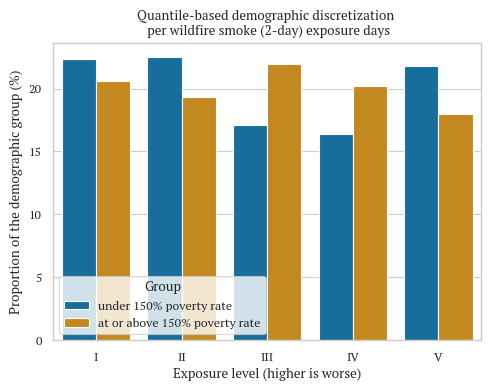

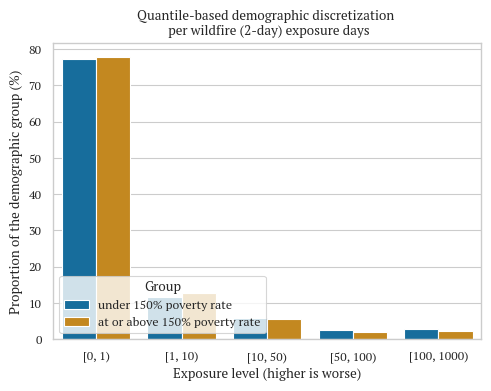

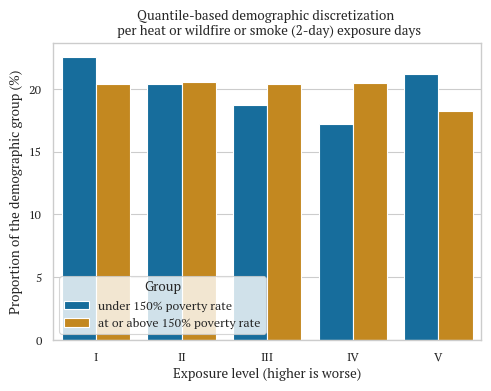

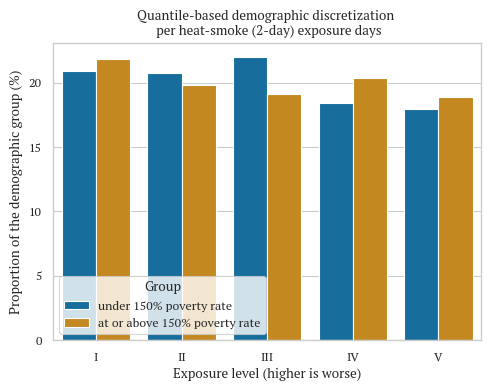

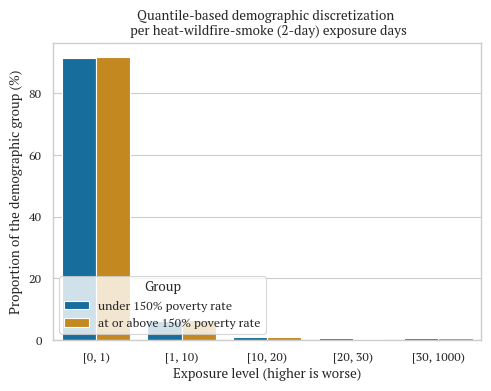

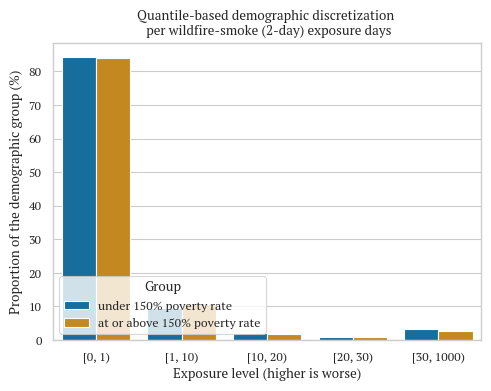

In [20]:
for hspt in hspts:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    exposure_per_category = df.groupby("exposure_category")[demographic_cols].sum()

    for dc in demographic_cols:
        exposure_per_category[dc + "_normalized"] = (
            exposure_per_category[dc] * 100 / exposure_per_category[dc].sum()
        )

    exposure_per_category = exposure_per_category.drop(columns=demographic_cols)

    exposure_per_category = exposure_per_category[
        [
            "E_POV150_normalized",
            "E_OVERPOV150_normalized",
        ]
    ]

    exposure_per_category = exposure_per_category.rename(
        columns={
            "E_POV150_normalized": "under 150% poverty rate",
            "E_OVERPOV150_normalized": "at or above 150% poverty rate",
        }
    )
    helper_400.plot_qbar(exposure_per_category, hspt, figname="income", legloc="lower left")